<a href="https://colab.research.google.com/github/KinaniJ/Kenya_Debt_Analysis/blob/main/KenyanDeptAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries and dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from google.colab import files
#upload = files.upload()
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
import pmdarima as pm

In [ ]:

df = pd.read_csv("Public Debt (Ksh Million) (1).csv")
df.head()

,Year,Month,Domestic Debt,External Debt,Total
0,2021,December,"4,032,368.18","4,174,371.53","8,206,739.71"
1,2021,November,"4,008,077.30","4,109,282.85","8,117,360.15"
2,2021,October,"3,959,523.30","4,083,124.54","8,042,647.84"
3,2021,September,"3,937,777.45","4,062,504.78","8,000,282.23"
4,2021,August,"3,864,875.78","4,054,862.85","7,919,738.63"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           262 non-null    int64 
 1   Month          262 non-null    object
 2   Domestic Debt  262 non-null    object
 3   External Debt  262 non-null    object
 4   Total          262 non-null    object
dtypes: int64(1), object(4)
memory usage: 10.4+ KB


# **Data Wrangling/cleaning**

In [159]:

def transform_data(df):

  """ change datatypes, replace missing data, make date column an index
  sort the values, change column names """
  df.rename(columns =  {'Domestic Debt': 'Domestic_Debt',
                  'External Debt': 'External_Debt'}, inplace = True) #change columns name
  df['Domestic_Debt'] = df['Domestic_Debt'].str.replace(',', '').astype(float) #change data type
  df['External_Debt'] = df['External_Debt'].str.replace(',', '').astype(float) #change data type
  df['Total'] = df['Total'].str.replace(',', '').astype(float) #change data type
  df["date"] = df["Year"].astype(str) + " " + df["Month"] # #combine year and month
  df["date"] = pd.to_datetime(df["date"], format = "%Y %B") + pd.offsets.MonthEnd(0) #change the datatype to datetime and set the day to end month
  df.drop(columns = ["Year", "Month"], inplace = True) #drop columns month and year since we have the date column
  df.set_index("date", inplace = True) #set date as index
  df = df.sort_values(by = 'date')

  return df

In [ ]:
transform_data(df)

,Domestic_Debt,External_Debt,Total
date,,,
1999-09-30,183417.00,320137.00,503554.00
1999-12-31,190300.00,311953.00,502253.00
2000-03-31,201463.22,396800.00,598263.22
2000-06-30,206127.00,395694.00,601821.00
2000-07-31,202362.00,394667.37,597029.37
...,...,...,...
2021-08-31,3864875.78,4054862.85,7919738.63
2021-09-30,3937777.45,4062504.78,8000282.23
2021-10-31,3959523.30,4083124.54,8042647.84


In [ ]:
df.isnull().sum()

,0
Domestic_Debt,0
External_Debt,0
Total,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Domestic_Debt,262.0,1.166927e+06,1.058535e+06,183417.0,326235.3925,732828.915,1813763.285,4032368.18
External_Debt,262.0,1.213153e+06,1.104623e+06,311953.0,417575.2700,623002.505,1801866.320,4174371.53
Total,262.0,2.380080e+06,2.159117e+06,502253.0,751207.2000,1361436.530,3615629.605,8206739.71


<ipython-input-127-306022262c3d>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.plot(subplots = True, ax = ax)


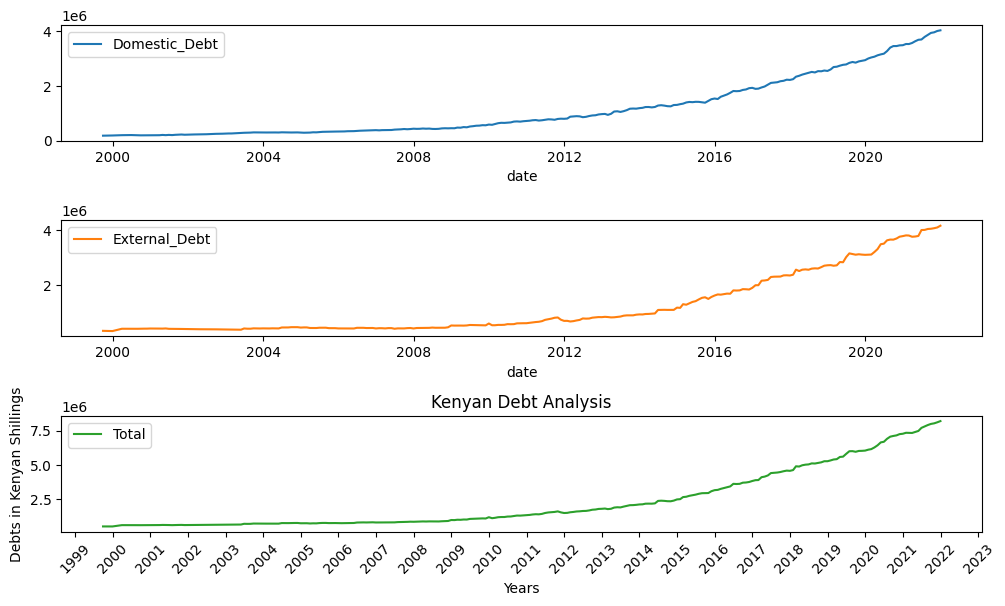

In [ ]:
##plot the dataset with all columns in the same canvas for proper comparison
fig, ax = plt.subplots(figsize = (10, 6))
df.plot(subplots = True, ax = ax)

plt.xlabel('Years')
plt.ylabel('Debts in Kenyan Shillings')
plt.title('Kenyan Debt Analysis')

# Formatting the x-axis to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Debts in Kenyan Shillings')
plt.title('Kenyan Debt Analysis')

# Rotating x-axis labels for readability
plt.xticks(rotation=45)

# Adding legend
plt.legend()

# Show the plot
plt.tight_layout(pad=0.5, w_pad=3.0, h_pad=1.0)
plt.show();


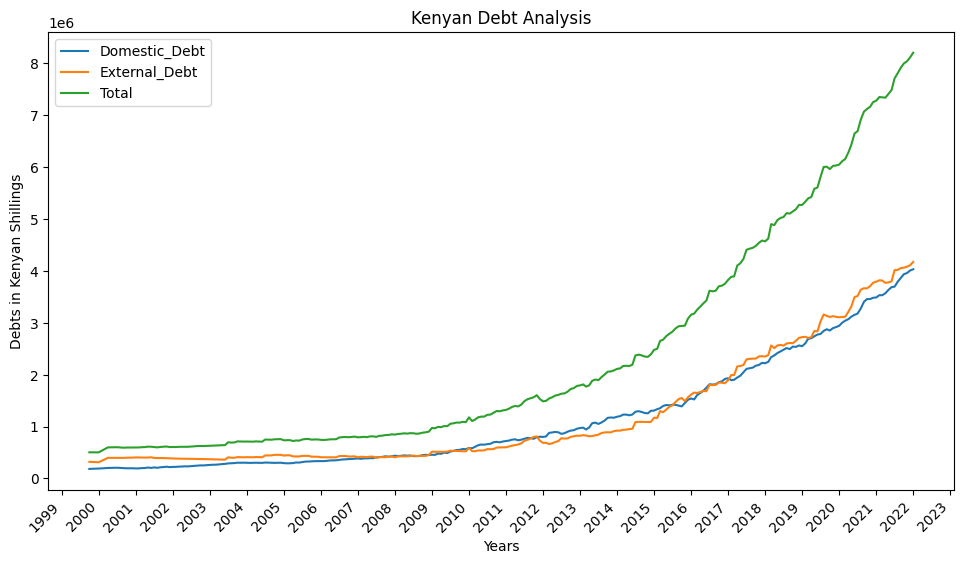

In [ ]:
#plot the dataset with all columns in the same canvas for proper comparison
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(subplots = False, ax = ax)


plt.xlabel('Years')
plt.ylabel('Debts in Kenyan Shillings')
plt.title('Kenyan Debt Analysis')

# Formatting the x-axis to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Debts in Kenyan Shillings')
plt.title('Kenyan Debt Analysis')

# Rotating x-axis labels for readability
plt.xticks(rotation=45)

# Adding legend
plt.legend()

# Show the plot
plt.tight_layout(pad=2.0, w_pad=3.0, h_pad=1.0)
plt.show();

# **resample and extrapolate**

In [ ]:
#resample to include all the 12months in the dataset and then fill the blanks with zero
df1 = df.copy()
df1 = df1.resample('M').asfreq().fillna(0)
df1.head()

,Domestic_Debt,External_Debt,Total
date,,,
1999-09-30,183417.0,320137.0,503554.0
1999-10-31,0.0,0.0,0.0
1999-11-30,0.0,0.0,0.0
1999-12-31,190300.0,311953.0,502253.0
2000-01-31,0.0,0.0,0.0


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Domestic_Debt,268.0,1.140802e+06,1.060770e+06,0.0,305919.9075,708075.875,1.764905e+06,4032368.18
External_Debt,268.0,1.185993e+06,1.106844e+06,0.0,410421.8125,598665.960,1.713376e+06,4174371.53
Total,268.0,2.326795e+06,2.163672e+06,0.0,747279.9800,1304813.105,3.474803e+06,8206739.71


# **decomposing and testing for stationality**

In [ ]:
df1.drop(columns = ['Domestic_Debt', 'External_Debt'], inplace = True)
df1.head()

,Total
date,
1999-09-30,503554.0
1999-10-31,0.0
1999-11-30,0.0
1999-12-31,502253.0
2000-01-31,0.0


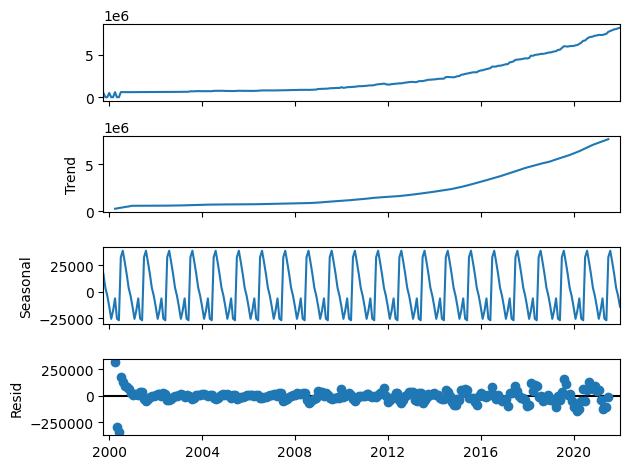

In [ ]:

#decomposing the dataset
decomposition = seasonal_decompose(df1, model='additive', period=12)

# Plotting the decomposed components
decomposition.plot()
plt.show()

In [ ]:
# Get the residuals (noise) from the decomposition
residuals = decomposition.resid.dropna()

# Perform the ADF test on the residuals
result_resid = adfuller(residuals)
print('ADF Statistic (residuals): %f' % result_resid[0])
print('p-value (residuals): %f' % result_resid[1])


ADF Statistic (residuals): -8.694572
p-value (residuals): 0.000000


In [ ]:
#testing stationarity
result = adfuller(df1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 6.163936
p-value: 1.000000


The p-value is very high The dataset is not stationary

In [ ]:
#differencing and testing stationarity
diff_df1 = df1.diff().diff().dropna()
result = adfuller(diff_df1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.399680
p-value: 0.000000


The dataset is stationary. The p-value is less that 0.05. we therefore reject the hypothesis(non stationary).

# **Modelling**


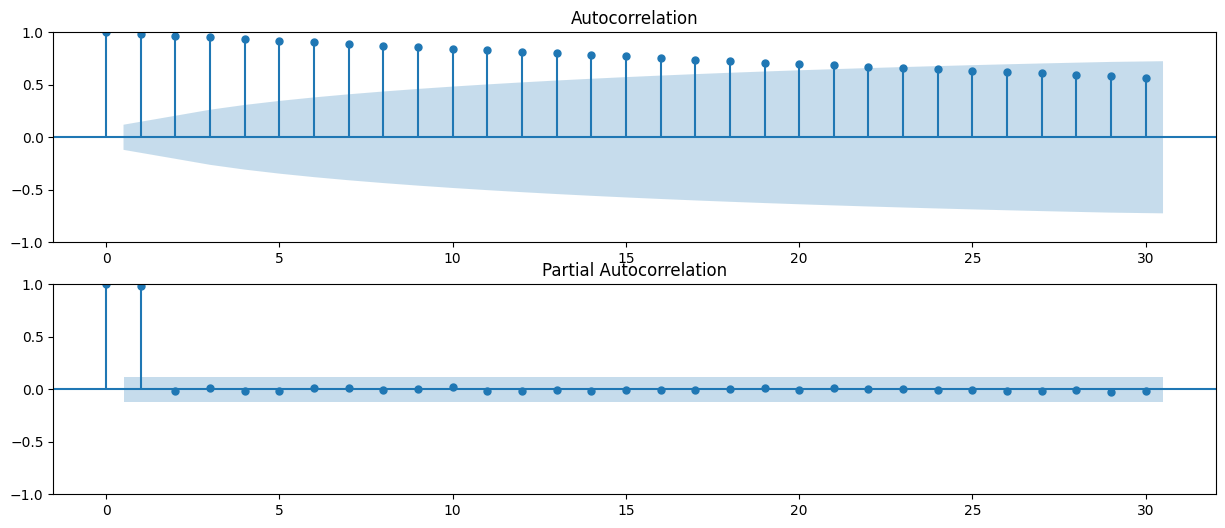

In [ ]:
#plot acf and pacf to get AR and MA
fig, (ax, ax1) = plt.subplots(2, 1, figsize = (15, 6))
plot_acf(df1, lags = 30,  ax = ax)
plot_pacf(df1, lags = 30, ax = ax1)
plt.show();

In [ ]:

#finding the right parameters
models = pm.auto_arima(df1,
                       seasonal = True,
                       m = 12,
                       d= 2,
                       D = 1,
                       start_p=1, start_q=1,
                       max_p = 3 , max_q = 3,
                       max_P = 3, max_Q = 3,
                       trace = True,
                       error_action = 'ignore',
                       suppress_warnings = True)


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=6482.699, Time=2.10 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=6813.194, Time=0.08 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=6646.410, Time=1.59 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=6493.493, Time=1.33 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=6480.701, Time=2.37 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=2.58 sec
 ARIMA(1,2,1)(0,1,2)[12]             : AIC=6482.698, Time=7.99 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=6497.368, Time=2.55 sec
 ARIMA(1,2,1)(1,1,2)[12]             : AIC=6484.599, Time=14.74 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=6620.309, Time=1.03 sec
 ARIMA(2,2,1)(0,1,1)[12]             : AIC=6365.178, Time=2.03 sec
 ARIMA(2,2,1)(0,1,0)[12]             : AIC=inf, Time=4.22 sec
 ARIMA(2,2,1)(1,1,1)[12]             : AIC=6367.146, Time=1.45 sec
 ARIMA(2,2,1)(0,1,2)[12]             : AIC=6367.142, Time=4.05 sec
 ARIMA(2,2,1)(1,1,0)[12]    

In [ ]:
#model
model = SARIMAX(df1, order = (2, 2, 3), seasonal_order = (0, 1, 1, 12)).fit()
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Total   No. Observations:                  268
Model:             SARIMAX(2, 2, 3)x(0, 1, [1], 12)   Log Likelihood               -3132.601
Date:                              Sat, 14 Sep 2024   AIC                           6279.202
Time:                                      01:18:01   BIC                           6303.964
Sample:                                  09-30-1999   HQIC                          6289.164
                                       - 12-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9191      0.067    -13.816      0.000      -1.049      -0.789
ar.L2         -0.83

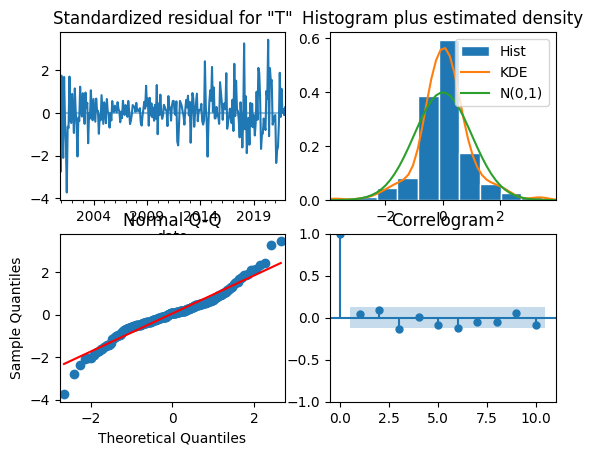

In [ ]:
#model diagnostic
model.plot_diagnostics()
plt.show();

# **Forecast**

In [ ]:
#arima mean forecast for the next 5years
pred = model.get_forecast(steps = 60)
pred_mean = pred.predicted_mean
pred_mean.head()



,predicted_mean
2022-01-31,8.261500e+06
2022-02-28,8.344845e+06
2022-03-31,8.441364e+06
2022-04-30,8.538784e+06
2022-05-31,8.638742e+06


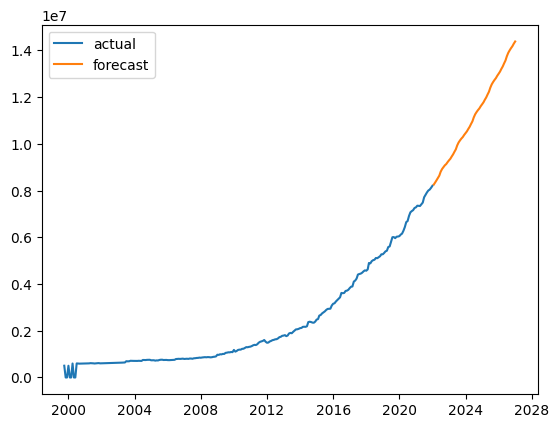

In [ ]:
#plot the forecast + actual data
plt.plot(df1, label = 'actual')
plt.plot(pred_mean, label = 'forecast')
plt.legend()
plt.show();

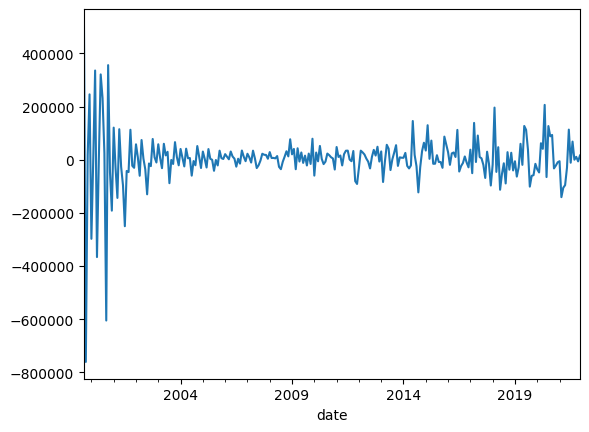

In [ ]:
#lot the residual
residuals = model.resid
residuals.plot()
plt.show();

In [ ]:
#mean absolute error
mae = np.mean(np.abs(residuals))
mae

51723.28436343408